In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner
from mpl_toolkits.mplot3d import Axes3D
import mplcursors

In [2]:
# Read the data from the text file
data = np.loadtxt("combine_pop.txt")
# Extract the columns
m1 = data[:, 0]
m2 = data[:, 1]
ecc = data[:, 2]

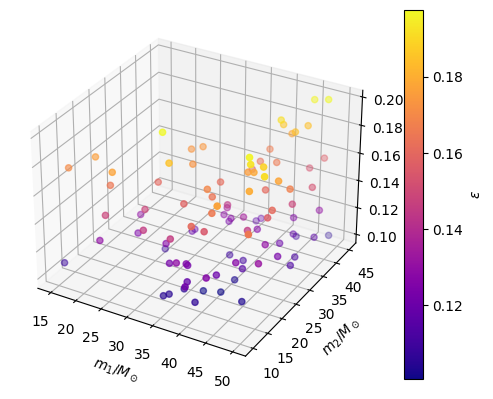

In [3]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points as dots with colors
sc = ax.scatter(m1, m2, ecc, c=ecc, cmap='plasma', marker='o')

# Set labels for the axes
ax.set_xlabel('$m_1/M_\odot$')
ax.set_ylabel('$m_2/M_\odot$')
ax.set_zlabel('$e$')

# Set a title for the plot
#ax.set_title('Eccentric Synthetic Population')

# Add interactivity with mplcursors
cursors = mplcursors.cursor(sc, hover=True)
cursors.connect("add", lambda sel: sel.annotation.set_text(f"({sel.target[0]:.2f}, {sel.target[1]:.2f}, {sel.target[2]:.2f})"))

# Add a colorbar
cbar = fig.colorbar(sc)
cbar.set_label('$\epsilon$')
#plt.savefig('pop3d038.png', bbox_inches='tight')
# Display the plot
#plt.show()


Text(0.05, 0.63, 'Max $m_2$: 45.13 $M_\\odot$')

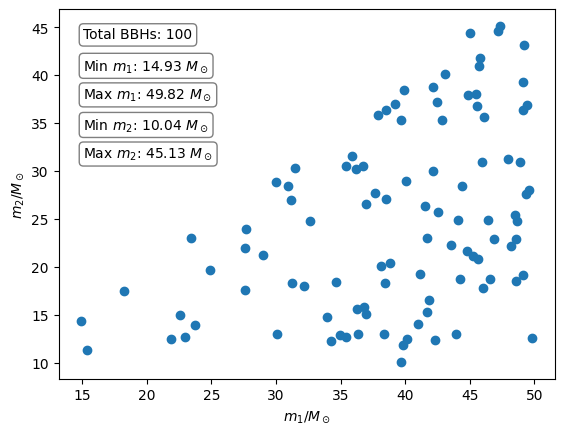

In [4]:
# Plot the data
plt.plot(m1, m2,'o')
plt.xlabel('$m_1/M_\odot$')
plt.ylabel('$m_2/M_\odot$')
#plt.title('Eccentric Synthetic Population')
num_data_points = len(data)
m1_min_value = np.round(np.min(m1),2)
m2_min_value = np.round(np.min(m2),2)
m1_max_value = np.round(np.max(m1),2)
m2_max_value = np.round(np.max(m2),2)

plt.text(0.05, 0.95, f'Total BBHs: {num_data_points}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.87, f'Min $m_1$: {m1_min_value} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.79, f'Max $m_1$: {m1_max_value} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.71, f'Min $m_2$: {m2_min_value} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.63, f'Max $m_2$: {m2_max_value} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
#plt.show()
#plt.savefig('pop2d038.png', bbox_inches='tight')

Text(0, 0.5, '$m_2^{scaled}/M_\\odot$')

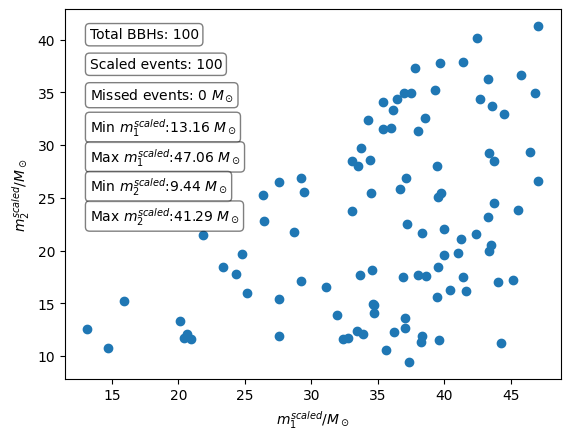

In [5]:
scaled_data = np.loadtxt("combine_scaled_pop.txt")
scaled_m1 = scaled_data[:,0]
scaled_m2 = scaled_data[:,1]
plt.plot(scaled_m1,scaled_m2,'o')

num_data_points = len(scaled_data)
m1_scl_min_value = np.round(np.min(scaled_m1),2)
m2_scl_min_value = np.round(np.min(scaled_m2),2)
m2_scl_max_value = np.round(np.max(scaled_m2),2)
m1_scl_max_value = np.round(np.max(scaled_m1),2)

plt.text(0.05, 0.95, f'Total BBHs: {num_data_points}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.87, f'Scaled events: {num_data_points}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
missed_data_points = len(data) - len(scaled_data)
plt.text(0.05, 0.79, f'Missed events: {missed_data_points} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.71, 'Min $m_1^{scaled}$:' f'{m1_scl_min_value} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.63, 'Max $m_1^{scaled}$:' f'{m1_scl_max_value} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.55, 'Min $m_2^{scaled}$:' f'{m2_scl_min_value} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.05, 0.47, 'Max $m_2^{scaled}$:' f'{m2_scl_max_value} $M_\odot$', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.xlabel('$m_1^{scaled}/M_\odot$')
plt.ylabel('$m_2^{scaled}/M_\odot$')
#plt.title('scaled m1 vs scaled m2')
#plt.savefig('pop2d038scl.png', bbox_inches='tight')

In [6]:
data_diff = np.loadtxt('combine_scaled_pop.txt')
m1_scl_nan = data_diff[:,0]
m2_scl_nan = data_diff[:,1]
M_total = m1 + m2
M_total_scale = m1_scl_nan + m2_scl_nan
M_total_differ = M_total - M_total_scale
m1_difference = m1-m1_scl_nan
m2_difference = m2-m2_scl_nan

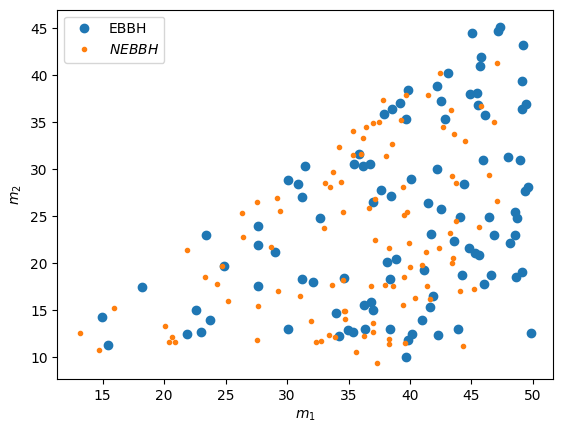

In [9]:
plt.plot(m1,m2,'o',label = 'EBBH')
plt.plot(m1_scl_nan,m2_scl_nan,'.',label = '$NEBBH$')
#plt.plot(ecc,M_total_differ,'+',label ='$M^{diff}$')
plt.xlabel('$m_1$')
plt.ylabel('$m_2$')
plt.legend(loc='best')

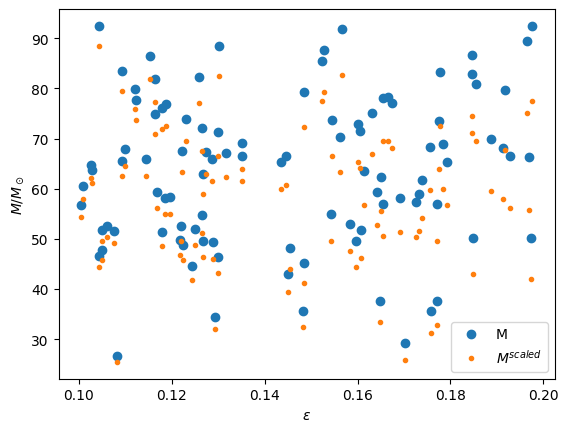

In [8]:
plt.plot(ecc,M_total,'o',label = 'M')
plt.plot(ecc,M_total_scale,'.',label = '$M^{scaled}$')
#plt.plot(ecc,M_total_differ,'+',label ='$M^{diff}$')
plt.xlabel('$\epsilon$')
plt.ylabel('$M/M_\odot$')
plt.legend(loc='best')
#plt.savefig('pop2d038diff.png', bbox_inches='tight')

In [13]:
data1 = h5py.File('myout_scl38_8000_100.hdf5','r')
#data2 = h5py.File('myout_0.38_m1_m2_ecc_60_8000.hdf5','r')
data_3D1 = np.array(data1['pos'])
#data_3D2 = np.array(data2['pos'])
print('Number of samples are : ',len(data_3D1))
#print(data_3D)
data1.keys()

Number of samples are :  100


<KeysViewHDF5 ['init_pos', 'log_prob', 'pos']>

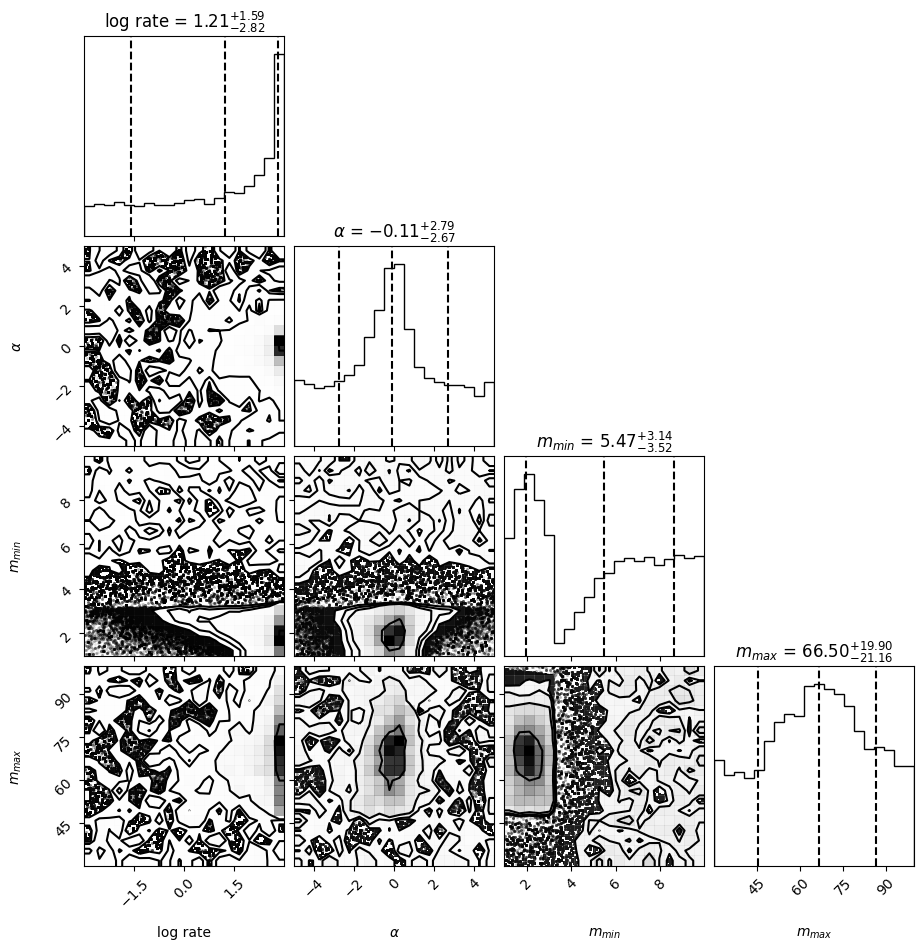

In [16]:
dat_new1 = data_3D1.reshape((800000,4))
figure1 = corner.corner(dat_new1,labels=[r"log rate", r"$\alpha$", r"$m_{min}$",r"$m_{max}$"]
                      ,show_titles=True, quantiles=[0.16, 0.5, 0.84])

In [17]:
print(dat_new1)

[[-1.0619381e-01 -4.3316569e+00  4.9683762e+00  5.0365204e+01]
 [ 1.2317628e+00 -3.7183754e+00  5.0793200e+00  8.9849052e+01]
 [ 1.0874028e+00  1.3763123e+00  7.1403351e+00  4.6753132e+01]
 ...
 [-2.7275801e-01 -4.1328871e-01  7.7976508e+00  4.1997910e+01]
 [ 2.9851766e+00 -5.3575093e-01  2.0384383e+00  6.2331848e+01]
 [-1.5527986e-02 -3.3362799e+00  8.4286814e+00  8.7997559e+01]]


In [11]:
dat_new3 = data_3D3.reshape((480000,5))
figure3 = corner.corner(dat_new3,labels=[r"log rate", r"$\alpha$", r"$m_{min}$",r"$m_{max}$",r"ecc"]
                      ,show_titles=True)

NameError: name 'data_3D3' is not defined

In [29]:
log_rate = [data_3D1[i][j][0] for i in range(8000) for j in range(60)] # first range is samples and second range is walker
alpha = [data_3D1[i][j][1] for i in range(8000) for j in range(60)]
m_min = [data_3D1[i][j][2] for i in range(8000) for j in range(60)]
m_max = [data_3D1[i][j][3] for i in range(8000) for j in range(60)]
#sigma_ecc = [data_3D[i][j][4] for i in range(8000) for j in range(60)]

Text(0.5, 0, 'log_rate')

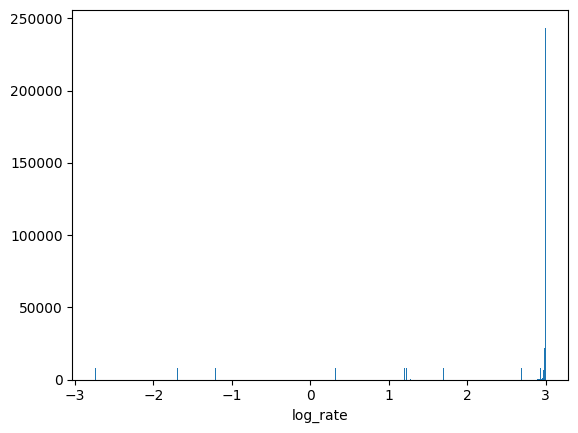

In [30]:
plt.hist(log_rate, bins='auto')
plt.xlabel('log_rate')

(-1.0, 0.5)

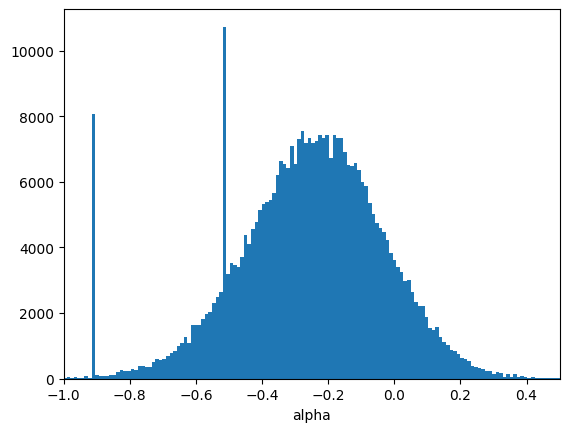

In [32]:
plt.hist(alpha, bins='auto')
plt.xlabel('alpha')
plt.xlim(-1,0.5)

Text(0.5, 0, 'm_min')

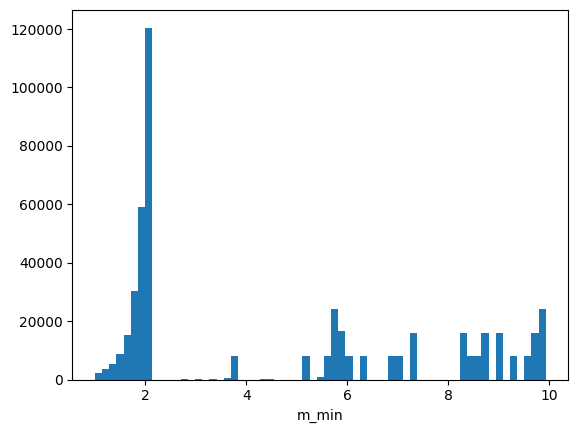

In [19]:
plt.hist(m_min, bins='auto')
plt.xlabel('m_min')

Text(0.5, 0, 'm_max')

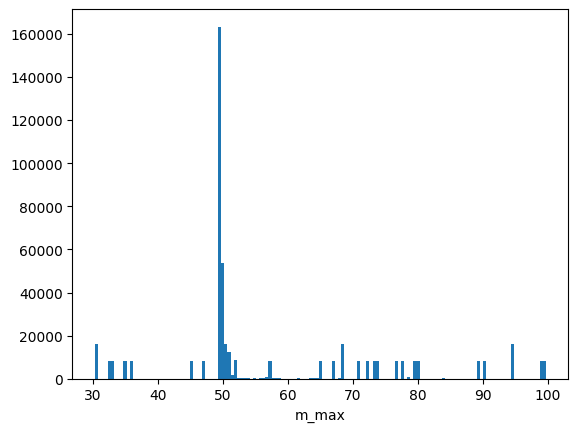

In [20]:
plt.hist(m_max, bins='auto')
plt.xlabel('m_max')

In [21]:
plt.hist(sigma_ecc, bins='auto')
plt.xlabel('sigma_ecc')

NameError: name 'sigma_ecc' is not defined